In [24]:
from bs4 import BeautifulSoup
import urllib.request
import nltk

In [25]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [26]:
soup.head()

[<meta charset="utf-8"/>,
 <meta content="width=device-width, initial-scale=1.0" name="viewport"/>,
 <title>PHP: Hypertext Preprocessor</title>,
 <link href="https://www.php.net/favicon.ico" rel="shortcut icon"/>,
 <link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>,
 <link href="https://www.php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>,
 <link href="https://www.php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>,
 <link href="https://www.php.net/index.php" rel="canonical"/>,
 <link href="https://www.php.net/index" rel="shorturl"/>,
 <link href="https://www.php.net/index" hreflang="x-default" rel="alternate"/>,
 <link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/>,
 <link href="/cached.php?t=1539765004&amp;f=/fonts/Font-Awesome/css/fontell

In [27]:
soup.title

<title>PHP: Hypertext Preprocessor</title>

In [28]:
text = soup.get_text()
text[:100]

'\n\n  \n  \n\n  PHP: Hypertext Preprocessor\n\n \n \n \n \n\n \n \n \n\n\n\n\n\n\n\n\n\n \n\n \n\n \n\n \n\n \n\n\n\n\n\n  \n    \n    \n    '

In [29]:
words = nltk.tokenize.word_tokenize(str(soup))
words[:10]

['<', '!', 'DOCTYPE', 'html', '>', '<', 'html', 'lang=', "''", 'en']

In [30]:
counts = nltk.FreqDist(words)
counts

FreqDist({'<': 1651, '>': 1651, "''": 1201, 'a': 322, 'href=': 311, '/a': 296, 'the': 237, ':': 208, '.': 197, 'PHP': 178, ...})

In [31]:
vocab = len(counts.keys())
vocab

914

In [32]:
words = sum(counts.values())
words

12029

In [33]:
lexdiv = float(words) / float(vocab)
lexdiv

13.160831509846828

In [34]:
print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 914 types and 12029 tokens for a lexical diversity of 13.161


In [35]:
counts.B()

914

The _n_ most common tokens/words in the corpus/webpage

In [36]:
print(counts.most_common(10))

[('<', 1651), ('>', 1651), ("''", 1201), ('a', 322), ('href=', 311), ('/a', 296), ('the', 237), (':', 208), ('.', 197), ('PHP', 178)]


The most frequent word in the webpage

In [37]:
counts.max()

'<'

words that are appearing only once in the webpage

In [38]:
counts.hapaxes()[0:10]

['DOCTYPE',
 'lang=',
 'en',
 'xmlns=',
 '//www.w3.org/1999/xhtml',
 'head',
 'charset=',
 'utf-8',
 'content=',
 'width=device-width']

Calculating the % frequency a word in appearing in the webpage.

In [39]:
counts.freq('<')*100

13.725164186549174

Plotting the frequencies of n most occuring words

In [40]:
import matplotlib.pyplot as plt

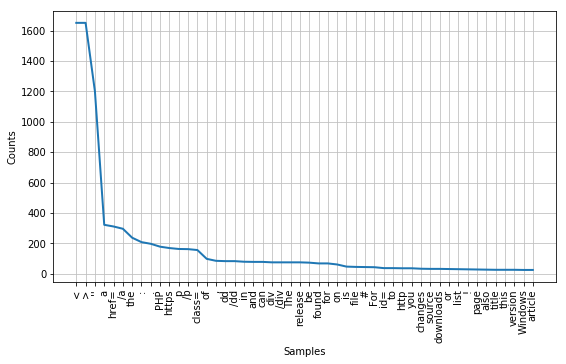

In [41]:
plt.figure(figsize=(9,5))
counts.plot(50, cumulative=False)

Plotting the frequencies of n most occuring words cumulatively.

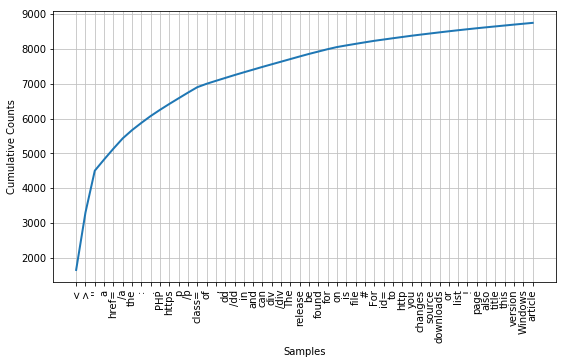

In [42]:
plt.figure(figsize=(9,5))
counts.plot(50, cumulative=True)

#### `ConditionalFreqDist()`

In [43]:
list(counts.items())[0:7]

[('<', 1651),
 ('!', 29),
 ('DOCTYPE', 1),
 ('html', 2),
 ('>', 1651),
 ('lang=', 1),
 ("''", 1201)]

In [44]:
categories = ['<','!','DOCTYPE','>','html','Thank']

In [45]:
cfdist = nltk.ConditionalFreqDist()
for wd in nltk.word_tokenize(str(soup)):
    condition = len(wd)
    cfdist[condition][wd] += 1
    
for condition in cfdist:
    for wd in cfdist[condition]:
#         if (condition > 15 and condition < 20):
        print("Conditional freq of", wd, cfdist[condition].freq(wd), "[condition is word length =", condition, "]")

Conditional freq of < 0.3638968481375358 [condition is word length = 1 ]
Conditional freq of ! 0.006391888913378885 [condition is word length = 1 ]
Conditional freq of > 0.3638968481375358 [condition is word length = 1 ]
Conditional freq of : 0.045845272206303724 [condition is word length = 1 ]
Conditional freq of / 0.00484901917566674 [condition is word length = 1 ]
Conditional freq of , 0.01873484681507604 [condition is word length = 1 ]
Conditional freq of ? 0.0026449195503636764 [condition is word length = 1 ]
Conditional freq of & 0.00242450958783337 [condition is word length = 1 ]
Conditional freq of ; 0.0028653295128939827 [condition is word length = 1 ]
Conditional freq of [ 0.002204099625303064 [condition is word length = 1 ]
Conditional freq of 7 0.00022040996253030638 [condition is word length = 1 ]
Conditional freq of ] 0.002204099625303064 [condition is word length = 1 ]
Conditional freq of 8 0.00022040996253030638 [condition is word length = 1 ]
Conditional freq of = 0.00